# Random Walks

You start on the first floor of the Empire State Building.  To determine your movements, you roll a single regular dice (die?).

One turn consists of the following:
If you roll 1 or 2, you move one floor down.  Note that the first floor is the bottom of the building, so you can't go any lower!  Instead, if you roll 3, 4, or 5, you move one floor up.  Finally, if you roll a 6, you roll again, and whatever the result you move up that number of floors.

What is the likelihood, after 100 turns, that you are at at least the 70th floor?  (Let's assume for simplicity that the Empire State Building has at least 600 floors, just in case.)  We'll answer this question by simulating the game a very large number of times.  To clarity, you want to END UP at at least the 70th floor; it is possible, after all, to reach that level then dip back down below the threshold.

One catch: at each turn, there's a 0.1% chance that you'll slip and fall back to the first floor.  Because you're clumsy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start our analysis by considering just a single turn (described above).  Suppose you are on the 50th floor.  Here's a simulation of what happens on your next turn.  For now, we'll ignore the possibility of slipping back down to the first floor.

In [32]:
# This ensures reproducibility.  Same sequence of random numbers.
np.random.seed(123)

# Starting floor
floor = 50

# Roll the dice
dice = np.random.randint(1,7)

# if/elif/else structure
if dice <= 2:
    floor = floor - 1
elif dice <= 5:
    floor = floor + 1
else:
    floor = floor + np.random.randint(1,7)

# Print out dice value, and the floor you're on after the turn
print(dice)
print(floor)

6
53


So according to this simulation, you rolled a 6, which means you rolled again.  This time you must've gotten 3, so you moved up three floors to the 53rd.

All 100 turns will together comprise a RANDOM WALK.  This random walk will take the form of a list.  Let's run one simulation of the whole game, 100 turns.

In [33]:
# Initialize random_walk list, starting at floor 1
random_walk = [1]

for x in range(100) :
    # At each iteration/turn, the starting floor is given by the ending floor at the previous iteration
    floor = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Use max to ensure floor can't go below 1
        floor = max(1, floor - 1)
    elif dice <= 5:
        floor = floor + 1
    else:
        floor = floor + np.random.randint(1,7)

    # Append result to list initialized above    
    random_walk.append(floor)

print(random_walk)

[1, 2, 3, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 2, 7, 6, 5, 6, 5, 6, 7, 8, 9, 10, 9, 10, 9, 10, 11, 12, 13, 12, 16, 17, 16, 17, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 34, 35, 39, 40, 39, 40, 41, 40, 41, 42, 44, 45, 46, 45, 44, 45, 46, 45, 44, 45, 46, 48, 47, 46, 47, 46, 47, 48, 49, 51, 50, 51, 52, 53, 54, 55, 54, 53, 54, 53, 54, 55, 54, 57, 58, 59, 60, 59, 60, 61, 65]


In this simulation, you didn't quite make it up to the 70th floor =(.  But this is just one simulation, so it doesn't answer our original question.

Before we proceed to simulating the game multiple times, let's visualize the simulation done above.

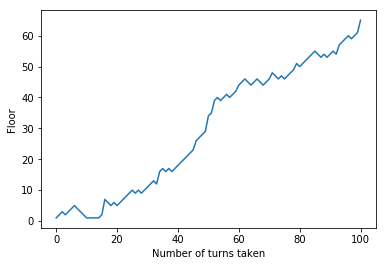

In [35]:
# Using matplotlib.pyplot
plt.plot(random_walk)
plt.xlabel('Number of turns taken')
plt.ylabel('Floor')
plt.show()

Since a single random walk was recorded as a list, we'll record multiple random walks as a list of lists.

Let's start by executing 10 random walks, i.e., by playing the game 10 times.  Notice the structure of a nested 'for' loop.

In [37]:
# Initialize empty list of lists 
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [1]
    for x in range(100) :
        floor = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            floor = max(1, floor - 1)
        elif dice <= 5:
            floor = floor + 1
        else:
            floor = floor + np.random.randint(1,7)
        random_walk.append(floor)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

print(all_walks)

[[1, 1, 3, 2, 3, 5, 6, 7, 12, 11, 12, 13, 14, 15, 16, 15, 20, 21, 22, 23, 22, 21, 20, 19, 18, 19, 20, 21, 27, 26, 25, 24, 25, 26, 27, 26, 27, 28, 27, 32, 33, 32, 31, 30, 29, 30, 29, 28, 30, 31, 34, 35, 37, 38, 39, 40, 39, 38, 39, 40, 41, 42, 41, 42, 43, 44, 47, 48, 49, 48, 49, 48, 49, 50, 51, 55, 54, 53, 54, 55, 56, 55, 56, 55, 56, 58, 63, 62, 63, 64, 65, 66, 67, 68, 67, 68, 69, 70, 72, 74, 73], [1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 39, 43, 47, 49, 51, 50, 51, 53, 52, 58, 59, 61, 62, 61, 62, 63, 64, 63, 64, 65, 66, 68, 67, 66, 67, 73, 78, 77, 76, 80, 81, 82, 83, 85, 84, 85, 84, 85, 84, 83, 89, 88], [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 8, 7, 8, 7, 8, 7, 8, 9, 13, 14, 13, 19, 18, 17, 18, 17, 16, 17, 16, 20, 19, 20, 19, 20, 19, 20, 22, 21, 20, 19, 20, 19, 24, 25, 26, 25, 24, 25, 24, 25, 24, 29, 30, 29, 28, 27, 2

So we get a list with 10 sublists, with each sublist representing a random walk.  It's not immediately clear which walks end up at floor 70 or higher.  Really we only care about the last element of each of these sublists, the floor at which the walk ends.

But for now, let's create a visually appealing plot of these walks.  We'll first convert all_walks to a numpy array, then transpose it, then plot.

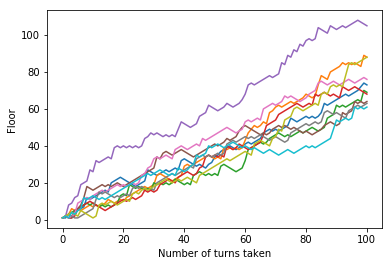

In [38]:
# Convert all_walks to Numpy array called np_aw
np_aw = np.array(all_walks)

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.xlabel('Number of turns taken')
plt.ylabel('Floor')
plt.show()

Now let's code in your clumsiness, increase the number of simulations, and re-plot.

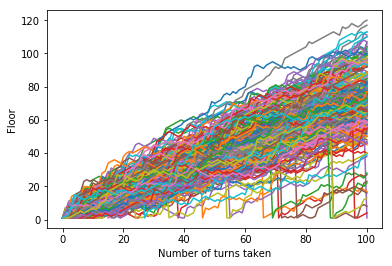

In [48]:
# Initialize empty list of lists, as before
all_walks = []

# Simulate random walk 250 times!
for i in range(250) :
    random_walk = [1]
    for x in range(100) :
        floor = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            floor = max(1, floor - 1)
        elif dice <= 5:
            floor = floor + 1
        else:
            floor = floor + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand(1,1) < 0.001 :
            floor = 1

        random_walk.append(floor)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.xlabel('Number of turns taken')
plt.ylabel('Floor')
plt.show()

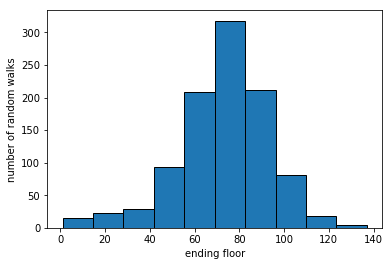

In [57]:
all_walks = []

# Simulate random walk 1000 times, because why not
for i in range(1000) :
    random_walk = [1]
    for x in range(100) :
        floor = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            floor = max(1, floor - 1)
        elif dice <= 5:
            floor = floor + 1
        else:
            floor = floor + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            floor = 1
        random_walk.append(floor)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))

# Recover endpoints from np_aw_t
ends = np_aw_t[-1]

# Plot histogram of ends
plt.hist(ends, ec="black")
plt.xlabel('ending floor')
plt.ylabel('number of random walks')
plt.show()

Now to find the desired probability....

In [58]:
# We are interested in the endpoints greater than or equal to 70
win_the_game = ends[ends >= 70]

# More specifically, the number of such outcomes, divided by 1000
len(win_the_game) / 1000

0.612

Answer: we've got about a 61% chance of ending up at floor 70 or higher!!

What if our goal was to reach the 60th floor?  The 50th floor?